# Neural Networks

A multilayered Decision System, Neural Networks are especially useful when the decision boundary isn't linear, i.e. the data isn't linearly separable.

For example: Consider a situation of predicting the prize of a house using its size, number of bedrooms, and its neighbourhood. Therefore, we can represent the current situation as following:


## Architecture

<img src = "files/nn.png">

Each black arrow represents one weight vector, and the three layers are labeled clearly. We can represent all of the weights at any layer as an array of the individual weight vectors. A basic, three-layer network has two sets of weights arrays and bias vectors. There’s no bias in the image, but the bias vectors don’t change the architecture in any meaningful way (they just get added in to change the neuron’s threshold). The way to go from the input to the output:

1. Apply the first layer’s weights to the raw data (via matrix multiplication). I’ll call this the input layer.
2. Add a bias vector and apply one of many possible activation functions to that new matrix, resulting in the hidden layer.
3. Apply the second layer’s weights to the hidden layer matrix and add a bias vector. I’ll call this the output layer.

Once we have the output layer, we apply some kind of non-linear normalization function in order to let the output values represent a probabilitiy distribution.

## Notation

* Suppose we have three input features x$_1$, x$_2$, x$_3$ which are collectively called the input layer, four hidden units which are collectively called the hidden layer and one output neuron called the output layer. 

* The term hidden layer is called “hidden” because we do not have the ground truth/training value for the hidden units. 

* This is in contrast to the input and output layers, both of which we know the ground truth values from (x$^{(i)}$, y$^{(i)}$)

* The first hidden unit requires the input x$_1$, x$_2$, x$_3$ and outputs a value denoted by a$_1$. We use the letter a since it refers to the neuron’s “activation” value. 

* Let a$^{[1]}_1$ denote the output value of the first hidden unit in the first hidden layer. We use zero-indexing to refer to the layer numbers. That is, the input layer is layer 0, the first hidden layer is layer 1 and the output layer is layer 2. Again, more complex neural networks may have more hidden layers. Given this mathematical notation, the output of layer 2 is a$^{[1]}_1$

* We can unify our notation:

### $x_1 = a^{[0]}_1$

### $x_2 = a^{[0]}_2$

### $x_3 = a^{[0]}_3$


* If we look at logistic regression g(x) as a single neuron:
### $g(x)  = \frac{1}{1 + e^{-w^Tx}}$



* The input to the logistic regression g(x) is three features x$_1$, x$_2$, x$_3$ and it outputs an estimated value of y. We can represent g(x) with a single neuron in the neural network. We can break g(x) into two distinct computations: (1) z = w$^T$x + b and (2) a = $\sigma$(z) where $\sigma$(z) = 1/(1 + e$^{-z}$).

* Representing Logistic Regression as a single Neuron:

<img src = "files/nn2.png">

### Representation

* W$^{[l]}$ is a matrix of parameters for the layer _l_

* W$^{[l]}_j$: Weights for the _l$^{th}$_ layer and _j$^{th}$_ unit and is a column in the Matrix W$^{[l]}$

* a$^{[l]}_j$: Activation output for the _l$^{th}$_ layer and _j$^{th}$_ unit



## The Maths

For the first layer:

The first hidden unit performs the following computation:
### $z_1^{[1]} = W_1^{[1]T}x + b_1^{[1]}$
### $a_1^{[1]} = g(z_1^{[1]})$

For the second, third and fourth layer:

### $z_2^{[1]} = W_2^{[1]T}x + b_2^{[1]}$
### $a_2^{[1]} = g(z_2^{[1]})$

### $z_3^{[1]} = W_3^{[1]T}x + b_3^{[1]}$
### $a_3^{[1]} = g(z_3^{[1]})$

### $z_4^{[1]} = W_4^{[1]T}a^{[1]} + b_4^{[1]}$
### $a_4^{[1]} = g(z_4^{[1]})$

Here a$^{[1]}$ is a vector $[ a_1^{[1]} a_2^{[1]} a_3^{[1]} a_4^{[1]}]^T $

Moving on, the output layer performs the computation:

### $z_1^{[2]} = W_1^{[2]T}x + b_1^{[2]}$
### $a_1^{[2]} = g(z_1^{[2]})$

## Vectorization  the Output Computation

Using matrix calculations:
<img src = "files/nn3.png">

## Vectorization over Training Examples
Suppose you have a training set with three examples. The activations for each example are as follows:
### $z^{[1](1)} = W^{[1]}x^{(1)} + b^{[1]}$
### $z^{[1](2)} = W^{[1]}x^{(2)} + b^{[1]}$
### $z^{[1](3)} = W^{[1]}x^{(3)} + b^{[1]}$

First, define:

<img src = "files/nn4.png">

We can then combine this into a single unified formulation:

<img src = "files/nn5.png">


## Training the Neural Networks

1. Randomly initialize the parameters and propogate in the forward direction.
2. The next step of the training process is to update the parameters. After a single forward pass through the neural network, the output will be a predicted value $\hat{y}$. We can then compute the loss L, in our case the log loss:
### $L = -[(1 − y) log(1 − \hat{y}) + y log\hat{y}]$
3. Given this value, we now must update all parameters in layers of the neural network. For any given layer index l, we update them:
### $W^{[l]} = W^{[l]} - \alpha\frac{\partial L}{\partial W^{[l]}}$
### $b^{[l]} = b^{[l]} - \alpha\frac{\partial L}{\partial b^{[l]}}$


Network parameters for our architecture: $W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}$

We will first compute the gradient with respect to $W^{[2]}$. The reason for this is that the influence of $W^{[1]}$ on the loss is more complex than that of $W^{[2]}$.

### $\frac{\partial L}{\partial W^{[2]}} = -\frac{\partial}{\partial W^{[3]}} [(1 − y) log(1 − \hat{y}) + y log\hat{y}]$ 
### $= -(1-y)\frac{\partial}{\partial W^{[2]}} log(1 - g(W^{[2]}a^{[1]} + b^{[2]})) - y\frac{\partial}{\partial W^{[2]}} log(g(W^{[2]}a^{[1]} + b^{[2]}))$
### $= -(1-y)\frac{1}{1 - g(W^{[2]}a^{[1]} + b^{[2]})} (-1)g'(W^{[2]}a^{[1]} + b^{[2]})(a^{[1]T}) - y\frac{1}{g(W^{[2]}a^{[1]} + b^{[2]})}g'(W^{[2]}a^{[1]} + b^{[2]})(a^{[1]T})$
For g(z) = $\sigma(z)$

g'(z) = $\sigma'(z)$ = $\sigma(z)\sigma(1-z)$

Substituting:
### $\frac{\partial L}{\partial W^{[2]}} = (1-y)\sigma(W^{[2]}a^{[1]} + b^{[2]})a^{[1]T} - y(1-\sigma(W^{[2]}a^{[1]} + b^{[2]}))a^{[1]T}$

### $= (1-y)a^{[2]}a^{[1]T} - y(1 - a^{[2]})a^{[1]T}$
### $= (a^{[2]} - y)a^{[1]T}$

#### Computing $\frac{\partial L}{\partial W^{[1]}}$

We know $\hat{y} = a^2$ and L depends on $\hat{y}$. Therefore, by chain rule we can write:

### $\frac{\partial L}{\partial W^{[1]}} = \frac{\partial L}{\partial a^{[2]}} \frac{\partial a^{[2]}}{\partial W^{[1]}} $

$a^{[2]}$ depends on $z^{[2]}$. Therefore,

### $\frac{\partial L}{\partial W^{[1]}} = \frac{\partial L}{\partial a^{[2]}} \frac{\partial a^{[2]}}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial W^{[1]}} $

$z^{[2]}$ depends on $a^{[1]}$. Therefore,

### $\frac{\partial L}{\partial W^{[1]}} = \frac{\partial L}{\partial a^{[2]}} \frac{\partial a^{[2]}}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial a^{[1]}} \frac{\partial a^{[1]}}{\partial W^{[1]}} $

$a^{[1]}$ depends on $z^{[1]}$, which directly depends on $W^{[1]}$. Therefore,

### $\frac{\partial L}{\partial W^{[1]}} = \frac{\partial L}{\partial a^{[2]}} \frac{\partial a^{[2]}}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial a^{[1]}} \frac{\partial a^{[1]}}{\partial z^{[1]}}  \frac{\partial z^{[1]}}{\partial W^{[1]}}$

Solving each partial derivative:

### $\frac{\partial z^{[1]}}{\partial W^{[1]}} = \frac{\partial }{\partial W^{[1]}} (W^{[1]}a^{[0]} + b^{[1]})$
### $\frac{\partial z^{[1]}}{\partial W^{[1]}} = a^{[0]T}$


### $\frac{\partial a^{[1]}}{\partial z^{[1]}} = \frac{\partial }{\partial z^{[1]}} g(z^{[1]})$
### $\frac{\partial a^{[1]}}{\partial z^{[1]}} = g'(z^{[1]})$







### $\frac{\partial z^{[2]}}{\partial a^{[1]}} = \frac{\partial}{\partial a^{[1]}} (W^{[2]}a^{[1]} + b^{[2]}) $
### $\frac{\partial z^{[2]}}{\partial a^{[1]}} = W^{[2]} $

### $\frac{\partial a^{[2]}}{\partial z^{[2]}} = \frac{\partial }{\partial z^{[1]}} g(z^{[2]})$
### $\frac{\partial a^{[2]}}{\partial z^{[2]}} = g'(z^{[2]}) = g(z^{[2]})(1-g(z^{[2]})) = a^{[2]}(1-a^{[2]})$


### $\frac{\partial L}{\partial a^{[2]}} = \frac{\partial }{\partial a^{[2]}} [-(1-y)log(1-a^{[2]}) - ylog(a^{[2]})]$ 

### $\frac{\partial L}{\partial a^{[2]}} = (1-y)\frac{1}{(1-a^{[2]})} - y\frac{1}{(a^{[2]})}$ 
### $\frac{\partial L}{\partial a^{[2]}} = \frac{a^{[2]} - y}{(1-a^{[2]})(a^{[2]})}$ 

### $\frac{\partial L}{\partial W^{[1]}} = (a^{[2]} - y)W^{[2]}g'(z^{[1]})a^{[0]T}$

Notice that the shapes do not match. Correcting the ordering of multiplied terms:
### $\frac{\partial L}{\partial W^{[1]}} = W^{[2]}g'(z^{[1]})(a^{[2]} - y)a^{[0]T}$

## Coding it Up

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


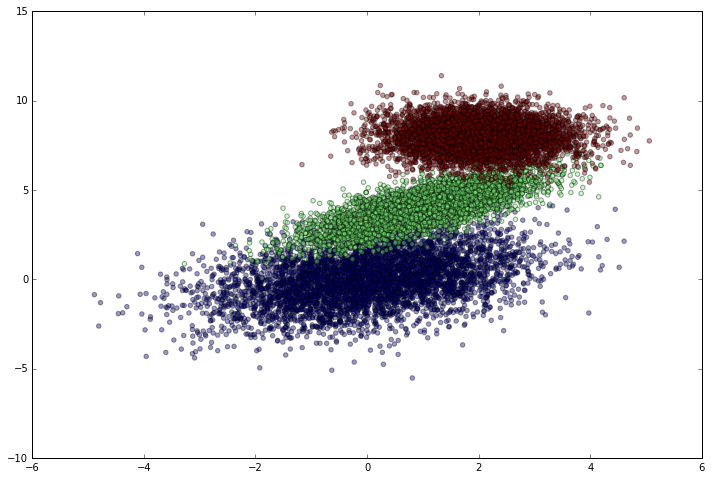

In [3]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[2, .75],[.75, 2]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
x3 = np.random.multivariate_normal([2, 8], [[0, .75],[.75, 0]], num_observations)

simulated_separableish_features = np.vstack((x1, x2, x3)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
				np.ones(num_observations), np.ones(num_observations) + 1))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)


In [6]:
labels_onehot = np.zeros((simulated_labels.shape[0], 3)).astype(int)
labels_onehot[np.arange(len(simulated_labels)), simulated_labels.astype(int)] = 1

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    simulated_separableish_features, labels_onehot, test_size = .1, random_state = 12)

In [16]:
hidden_nodes = 5
num_features = simulated_separableish_features.shape[1]
num_labels = labels_onehot.shape[1]

In [17]:
layer1_weights_array = np.random.normal(0, 1, [num_features, hidden_nodes]) 
layer1_biases_array = np.zeros((1, hidden_nodes))

layer2_weights_array = np.random.normal(0, 1, [hidden_nodes, num_labels]) 
layer2_biases_array = np.zeros((1, num_labels))

In [20]:
def softmax(output_array):
    logits_exp = np.exp(output_array)
    return logits_exp / np.sum(logits_exp, axis = 1, keepdims = True)

In [21]:
def relu_activation(data_array):
    return np.maximum(data_array, 0)

In [24]:
training_data = train_dataset
training_labels = train_labels
learning_rate = .01

for step in xrange(5001):

    input_layer = np.dot(training_data, layer1_weights_array)
    hidden_layer = relu_activation(input_layer + layer1_biases_array)
    output_layer = np.dot(hidden_layer, layer2_weights_array) + layer2_biases_array
    output_probs = softmax(output_layer)
    
    output_error_signal = (output_probs - training_labels) / output_probs.shape[0]
    
    error_signal_hidden = np.dot(output_error_signal, layer2_weights_array.T) 
    error_signal_hidden[hidden_layer <= 0] = 0
    
    gradient_layer2_weights = np.dot(hidden_layer.T, output_error_signal)
    gradient_layer2_bias = np.sum(output_error_signal, axis = 0, keepdims = True)
    
    gradient_layer1_weights = np.dot(training_data.T, error_signal_hidden)
    gradient_layer1_bias = np.sum(error_signal_hidden, axis = 0, keepdims = True)

    layer1_weights_array -= learning_rate * gradient_layer1_weights
    layer1_biases_array -= learning_rate * gradient_layer1_bias
    layer2_weights_array -= learning_rate * gradient_layer2_weights
    layer2_biases_array -= learning_rate * gradient_layer2_bias
    

In [26]:
def accuracy(predictions, labels):
    preds_correct_boolean =  np.argmax(predictions, 1) == np.argmax(labels, 1)
    correct_predictions = np.sum(preds_correct_boolean)
    accuracy = 100.0 * correct_predictions / predictions.shape[0]
    return accuracy

input_layer = np.dot(test_dataset, layer1_weights_array)
hidden_layer = relu_activation(input_layer + layer1_biases_array)
scores = np.dot(hidden_layer, layer2_weights_array) + layer2_biases_array
probs = softmax(scores)
print 'Test accuracy: {0}%'.format(accuracy(probs, test_labels))

Test accuracy: 96.4666666667%


## References
* Andrew Ng's Course on Machine Learning - CS 229
* Logistic Regression from Scratch (https://beckernick.github.io/logistic-regression-from-scratch/)